In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# Name: Xian Liu 

# Instructions

* For math problems, you are _**encouraged**_ to use $\LaTeX,$ however handwritten solutions are also accepted provided that they are __extremely__ tidy and thorough. 
* Please make sure you explain the rationale behind each step -- this is very important because:
   1.  It shows me that you understood each step and that you are not (just) copying from a friend or a solution found online. 
   2.  It helps me understand your approach, I often see you using new approaches that are correct and also different that what I or the author came up with. 
* <font color="red"> **ALSO:** please **staple** your solutions before submitting them. </font> I will start deducting points for unstapled submissions if this continues to be a problem. Be a good friend and offer to share a stapler with a freind if they need it -- I cannot keep track of a stack of loose paper!

* Pleas make sure <font color=red> all of your code fits on the printed pages</font>, this may require breaking long lines into several shorter ones. I must see your code in order to beleive it is correct. 

# Problems

## Problem 1
4.14 (*) Show that for a linearly separable data set, the maximum likelihood solution
for the logistic regression model is obtained by finding a vector $\mathbf{w}$ whose decision
boundary $\mathbf{w}^T \phi(\mathbf{x}) = 0$ separates the classes and then taking the magnitude of $\mathbf{w}$ to
infinity.  
> **NOTE:** is this a good or a bad thing about the maximum likelihood solution...?

Please see attached.

## Problem 2
4.18 (*) Using the result (4.91) for the derivatives of the softmax activation function,
show that the gradients of the cross-entropy error (4.108) are given by (4.109).

Please see attached.

# Problem 3
Demonstrate the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) class from sklearn on a *two dimensonal* slice of either:
1. The fisher iris data
2. Data from one of the kaggle competitions

You must:
1. Separate your data into five different _test_ and _training_ sets, using [Stratified Kfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) cross validation, making sure that you set the parameter to shuffle your data. 
1. For each of the 5 different folds/classifiers:
    1. Show the the way the space is partitioned, e.g. Fig 2.28 or Fig 4.5. 
        1. Include a scatter plot of the training data, using colors to indicate the different target labels. 
        1. Include a scatter plot of the test data using a different marker (e.g. squares), also using different colors to indicate expected labels. 
    1. Use the [Classification Report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) and the [Confusion Matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) to present the quality of your classifiers.

You must share code as well as figures. 
Comment on how well you think your classifier will work on a secret test set (e.g. Kaggle's test set)

> **HINT:** I do not expect this to take a large amount of code; most of what I ask is available already in scipy / sklearn

I did this in about 30 minutes and 35 lines of code (other than what I have shared with you).  Here is the output _I_ produced for the first fold. I made use of the `plot_confusion_matrix` function that I have included in this notebook for you to use as well. 

### Fold # 1 (of 5)

<img src="my-soln-plot-fold1.png">
```
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.70      0.82        10
  virginica       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30
```
<img src="my-soln-cm-fold1.png">


In [2]:
from sklearn.datasets import load_iris  # or use some other data, that is ok
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [3]:
from collections import namedtuple
Fold = namedtuple("Fold", "X_train X_test y_train y_test")
feature_names = ["petal length", "petal width"]

In [4]:
iris = load_iris()
labels = [l[:-5] for l in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns=labels)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
def k_fold_split(feature_names, skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=127)):
    data = iris_df.loc[:, feature_names].as_matrix()
    target = iris.target
    folds = []
    for train_index, test_index in skf.split(data, target):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        folds.append(Fold(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test))
    return folds

In [6]:
folds = k_fold_split(feature_names)

In [7]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def train_one_fold(fold):
    clf = LogisticRegression()
    clf.fit(fold.X_train, fold.y_train)
    # make plot
    x_min, y_min = fold.X_train.min(axis=0)
    x_max, y_max = fold.X_train.max(axis=0)
    
    Y, X = mgrid[y_min-0.5: y_max+0.5: 100j, x_min-0.5: x_max + 0.5: 100j]
    Z = clf.predict(np.column_stack((X.ravel(), Y.ravel())))
    
    figure()
    figsize(15,6)
    subplot(1,2,1)
    plt.pcolormesh(X, Y, Z.reshape(X.shape), cmap=plt.cm.Pastel1)
    
    markers = ['x', '+', 'o']
    colors = ['r', 'y', 'b']
    for target in range(3):
        train_indices = fold.y_train==target
        scatter(fold.X_train[train_indices][:, 0], fold.X_train[train_indices][:,1], marker=markers[target], color=colors[target])
        test_indices = fold.y_test==target
        scatter(fold.X_test[test_indices][:,0], fold.X_test[test_indices][:,1], marker='s', color=colors[target],facecolor="None")
   
    xlabel(feature_names[0])
    ylabel(feature_names[1])
    # classification report
    y_pred = clf.predict(fold.X_test)
    print classification_report(fold.y_test, y_pred, target_names=iris.target_names)
    # confusion matrix
    cm = confusion_matrix(fold.y_test, y_pred)
    subplot(1,2,2)
    plot_confusion_matrix(cm, classes=iris.target_names)
    show()

<IPython.core.display.Javascript object>


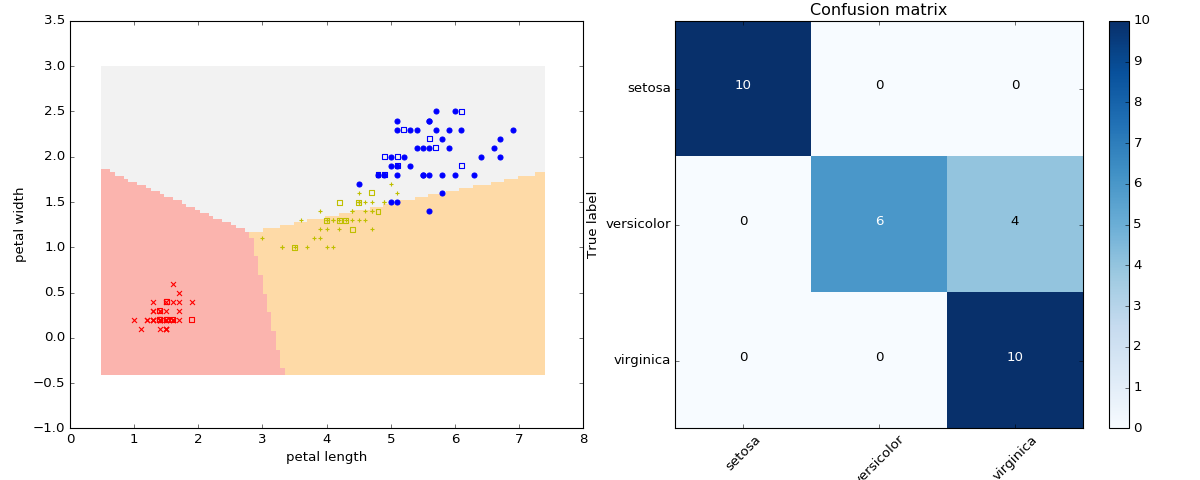

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.60      0.75        10
  virginica       0.71      1.00      0.83        10

avg / total       0.90      0.87      0.86        30



In [14]:
train_one_fold(folds[0])

<IPython.core.display.Javascript object>


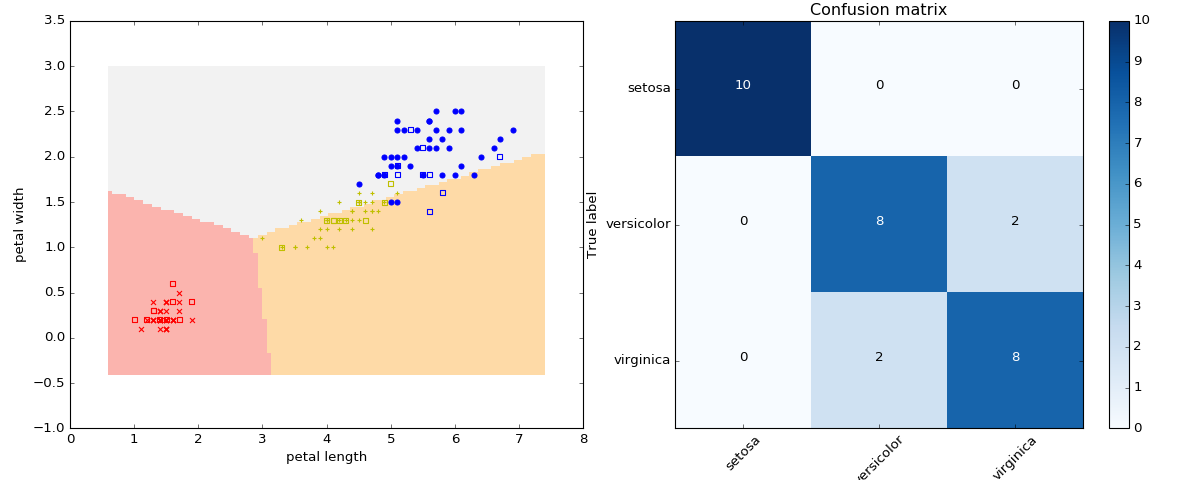

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.80      0.80      0.80        10
  virginica       0.80      0.80      0.80        10

avg / total       0.87      0.87      0.87        30



In [10]:
train_one_fold(folds[1])

<IPython.core.display.Javascript object>


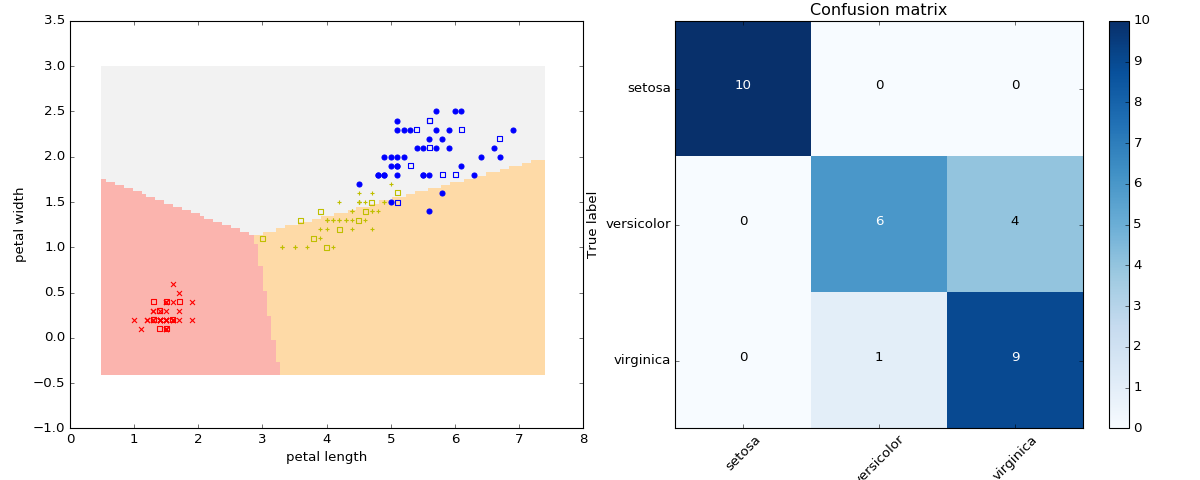

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.86      0.60      0.71        10
  virginica       0.69      0.90      0.78        10

avg / total       0.85      0.83      0.83        30



In [11]:
train_one_fold(folds[2])

<IPython.core.display.Javascript object>


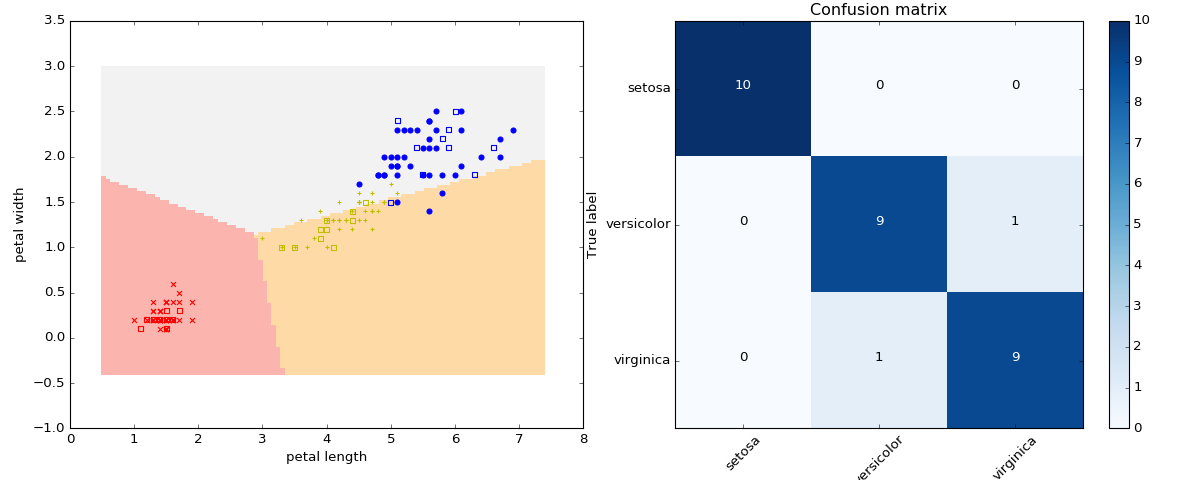

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.90      0.90      0.90        10
  virginica       0.90      0.90      0.90        10

avg / total       0.93      0.93      0.93        30



In [12]:
train_one_fold(folds[3])

<IPython.core.display.Javascript object>


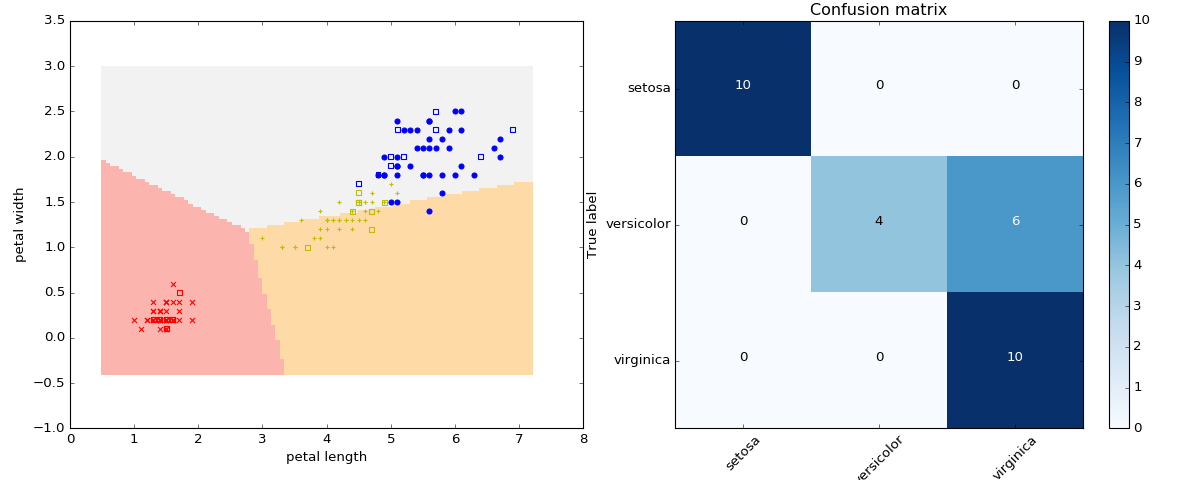

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.40      0.57        10
  virginica       0.62      1.00      0.77        10

avg / total       0.88      0.80      0.78        30



In [13]:
train_one_fold(folds[4])